C:\Users\MEGA\AppData\Local\Temp\ipykernel_9960\802282149.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html_table))
C:\Users\MEGA\AppData\Local\Temp\ipykernel_9960\802282149.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html_table))
C:\Users\MEGA\AppData\Local\Temp\ipykernel_9960\802282149.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html_table))
C:\Users\MEGA\AppData\Local\Temp\ipykernel_9960\802282149.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read

Mean Squared Error: 79363397.79849167


C:\Users\MEGA\AppData\Local\Temp\ipykernel_9960\802282149.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html_table))


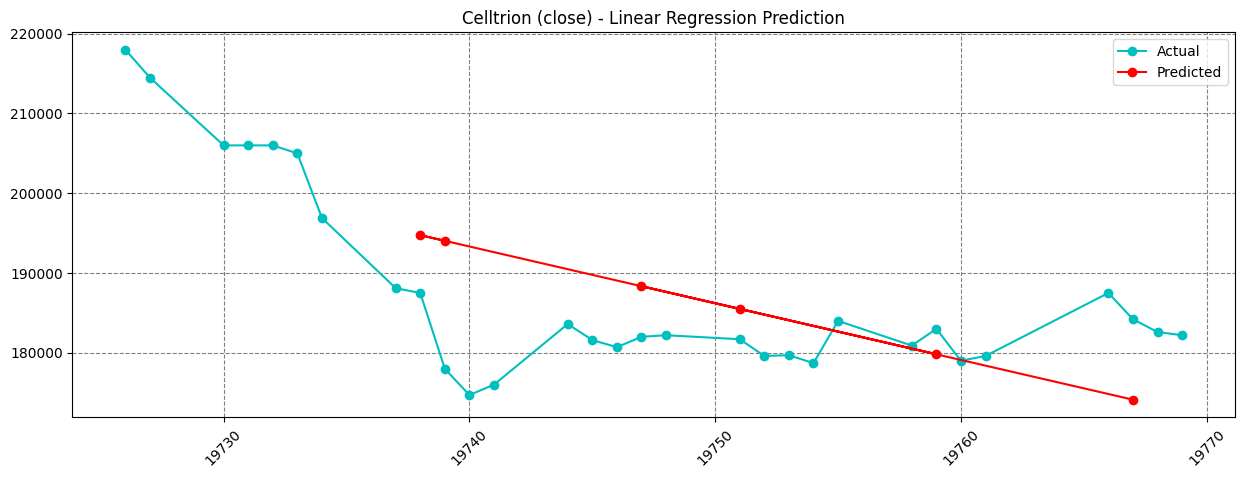

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs
import requests


headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}

df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, 10):
    page_url = '{}&page={}'.format(sise_url, page)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))
    df = pd.concat([df, table[0].dropna()])

df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')

df['날짜'] = pd.to_datetime(df['날짜'], format='%Y.%m.%d')
#df['날짜'] = 


X = mdates.date2num(df['날짜']).reshape(-1,1)
y = df['종가']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


plt.figure(figsize=(15, 5))
plt.title('Celltrion (close) - Linear Regression Prediction')
plt.xticks(rotation=45)predict
plt.plot(df['날짜'], df['종가'], 'co-', label='Actual')
plt.plot(X_test, y_pred, 'ro-', label='Predicted')
plt.legend()
plt.grid(color='gray', linestyle='--')
plt.show()

In [13]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,19726.0,218000.0,13500.0,228500.0,229000.0,214500.0,1593074.0
12,19727.0,214500.0,3500.0,215000.0,220500.0,213000.0,970137.0
11,19730.0,206000.0,8500.0,213000.0,216000.0,204500.0,901789.0
10,19731.0,206000.0,0.0,211000.0,214000.0,204000.0,617985.0
9,19732.0,206000.0,0.0,206000.0,210000.0,205000.0,409471.0
5,19733.0,205000.0,1000.0,207000.0,209000.0,197700.0,1325154.0
4,19734.0,196900.0,8100.0,198200.0,205500.0,194600.0,1729666.0
3,19737.0,188100.0,8800.0,196500.0,199000.0,186300.0,1423409.0
2,19738.0,187500.0,600.0,192400.0,194300.0,186000.0,1163432.0
1,19739.0,178000.0,9500.0,186600.0,186700.0,177100.0,1280203.0
